In [1]:
import os

from torch import Tensor

from DatasetHandler import DatasetHandler
from CommonUtilities import CommonUtilities

from globals.GlobalParameters import GlobalParameters

from cnns.resnet50 import ResNet50
from losses.crossentropy import CrossEntropyLoss
from attacks.fgsm import FGSM
from attacks.ifgsm import IFGSM
from attacks.pgd import PGD
from visualisers.plot_predictions import PlotPredictions

In [2]:
working_path: str = os.getcwd() # '/Users/fabio/Documents/GitHub/prova'
images_path: str = working_path + "/images" # '/Users/fabio/Documents/GitHub/prova/images'

dataset: DatasetHandler = DatasetHandler(images_path) # dataset = <DatasetHandler.DatasetHandler at 0x16916a270>

model_function: ResNet50 = ResNet50()

loss_function: CrossEntropyLoss = CrossEntropyLoss()

fgsm: FGSM = FGSM()
ifgsm: IFGSM = IFGSM()
pgd: PGD = PGD()

plots: PlotPredictions = PlotPredictions()

In [3]:
triplas: list = []

for image in dataset.get_dataset_list()[:1]:
    
    original_image: Tensor = CommonUtilities.str2tensor(image)

    original_image: Tensor = CommonUtilities.preprocess(original_image)
    
    perturbed_image: Tensor = fgsm.do_attack(original_image, model_function, loss_function, GlobalParameters.epsilon_fgsm)
    #perturbed_image: Tensor = ifgsm.do_attack(original_image, model_function, loss_function, GlobalParameters.epsilon_ifgsm, GlobalParameters.alpha_ifgsm, GlobalParameters.iters_ifgsm)
    #perturbed_image: Tensor = pgd.do_attack(original_image, model_function, loss_function, GlobalParameters.epsilon_pgd, GlobalParameters.alpha_pgd, GlobalParameters.iters_pgd)


    original_image: Tensor = CommonUtilities.postprocess(original_image)
    perturbed_image: Tensor = CommonUtilities.postprocess(perturbed_image)

    noise: Tensor = perturbed_image - original_image

    triplas.append((original_image, noise, perturbed_image))

In [4]:
# TODO: cerca cosa fa il metodo zero_grad() in fgsm.py e mettiti a fare debug per vedere se viene utilizzata effettivamente (il colore bianco del metodo mi fa pensare che non venga in qualche riconosciuta ed eseguita)

# TODO metodo per creare un rettangolo attorno al soggetto analizzato dalla CNN (guarda la risposta di copilot riguardo l'uso di gradcam)

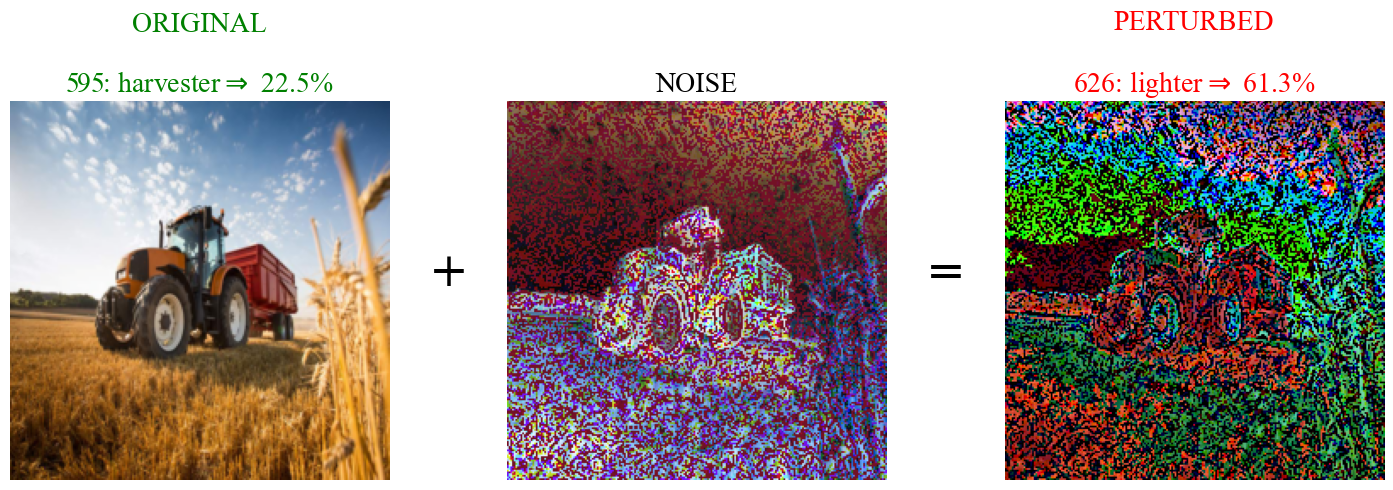

In [5]:
for tripla in triplas:
    plots.plot_predictions(model_function, tripla, show_noise = True)